# **Pengaruh Peningkatan Jumlah Transportasi dengan Kualitas Udara di DKI Jakarta Tahun 2020-2023**

## **Authors**

No | Name | ID | GitHub username | In charge activity
:-: | :- | :-: | :- | :-
1 | Darell Timothy Tarigan | 10222014 | [DarellTim](https://github.com/DarellTim) | YouTube presenation video
2 | Izzah Huwaidah | 10222040 | [IzzahHuwaidah](https://github.com/IzzahHuwaidah) | Notebook finalization
3 | Azwa Aliyah Zaki | 10222080 | [Alivican](https://github.com/Alivican) | Discussion on GitHub issues
4 | Ashma Nisa Sholihah Adma  | 10222091 | [ashmanisaa](https://github.com/ashmanisaa) | Slide on OSF

## **Abstract**
ini abstrak
*Write information about your work, method, results, and conclusion in brief, not more that 100 words. (Point: 5)*

## **Background**
*Write purpose of your work, problem to solve, current state of similar work, and include at least four references. (Point: 5)*

## **Method**
*Write flowchart, algorithm, code, libraries, dependencies, platform, software, and any infomration that help others to reproduce your work. Include equations and figures if necessary. (Point: 10)*

In [123]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata
from shapely.geometry import Point

##### **Membuat data excel rata-rata parameter ISPU 2020-2023**

In [124]:
# Buat data rata-rata parameter ISPU tiap tahun

# Ganti dengan path file 
file_2020 = 'Data/ISPU 2020.xlsx'
file_2021 = 'Data/ISPU 2021.xlsx'
file_2022 = 'Data/ISPU 2022.xlsx'
file_2023 = 'Data/ISPU 2023.xlsx'
file_trans = 'Data/Jumlah kendaraan Bermotor 2020-2023.xlsx'
file_mean_ispu = 'Data/Rata-rata_ISPU_per_Tahun.xlsx'

# Baca file Excel
df_2020 = pd.read_excel(file_2020)
df_2021 = pd.read_excel(file_2021)
df_2022 = pd.read_excel(file_2022)
df_2023 = pd.read_excel(file_2023)
df_trans = pd.read_excel(file_trans)
df_mean = pd.read_excel(file_mean_ispu)

df_2020['tahun'] = 2020
df_2021['tahun'] = 2021
df_2022['tahun'] = 2022
df_2023['tahun'] = 2023

# Gabungkan semua data menjadi satu DataFrame
df = pd.concat([df_2020, df_2021, df_2022, df_2023])

# Pastikan semua kolom numerik memiliki tipe data float, dan ubah jika tidak sesuai
numeric_columns = ['pm_10', 'so2', 'co', 'o3', 'no2']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Mengubah ke numerik, non-numerik jadi NaN


# Menghitung rata-rata tiap parameter per tahun (mengabaikan NaN)
rata_rata_tahunan = df.groupby('tahun')[numeric_columns].mean()

# Menampilkan hasil rata-rata
print("Rata-rata Parameter ISPU per Tahun:")
print(rata_rata_tahunan)




Rata-rata Parameter ISPU per Tahun:
           pm_10        so2         co         o3        no2
tahun                                                       
2020   60.412568  36.016997  20.830137  68.581967  15.377049
2021   52.896257  35.697308  11.934997  31.338167  20.411031
2022   59.835165  47.903846  18.409341  57.337912  28.766484
2023   54.934579  41.864486  11.069315  27.193146  18.581776


##### **Menghitung statistik deskriptif (mean, standar deviasi, nilai minimum dan maksimum, kuartil di 25%,50% dan 75%) untuk kolom polutan**

In [125]:
# Menghitung statistik deskriptif (mean,standar deviasi, nilai minimum dan maksimum, kuartil di 25%,50% dan 75%) untuk kolom polutan

# Pilih kolom yang ingin dianalisis
columns = ['pm_10', 'so2', 'co', 'o3', 'no2']

# Hitung statistik deskriptif
descriptive_stats = pd.DataFrame({
    'mean': df[columns].mean(),
    'standar deviasi': df[columns].std(),
    'nilai minimum': df[columns].min(),
    '25%': df[columns].quantile(0.25),
    '50%': df[columns].quantile(0.50),
    '75%': df[columns].quantile(0.75),
    'nilai maksimum': df[columns].max()
})

# Format angka dengan dua desimal
descriptive_stats = descriptive_stats.round(2)

# Tampilkan tabel statistik deskriptif
print("\nStatistik Deskriptif ISPU 2020-2023:")
print(descriptive_stats)
# Simpan tabel statistik ke file Excel
#descriptive_stats.to_excel('statistik_ispu_2020_2023.xlsx', sheet_name='Statistik Deskriptif')

print("\nTabel berhasil disimpan sebagai 'statistik_ispu_2020_2023.xlsx'.")





Statistik Deskriptif ISPU 2020-2023:
        mean  standar deviasi  nilai minimum   25%   50%   75%  nilai maksimum
pm_10  55.13            15.18            3.0  46.0  56.0  65.0           179.0
so2    39.24            12.82            2.0  28.0  41.0  51.0            89.0
co     13.21             7.19            1.0   9.0  12.0  16.0            75.0
o3     36.37            22.83            4.0  22.0  30.0  43.0           213.0
no2    20.09             9.69            0.0  13.0  19.0  26.0            65.0

Tabel berhasil disimpan sebagai 'statistik_ispu_2020_2023.xlsx'.


##### **Menghitung matriks korelasi antar kadar polutan**

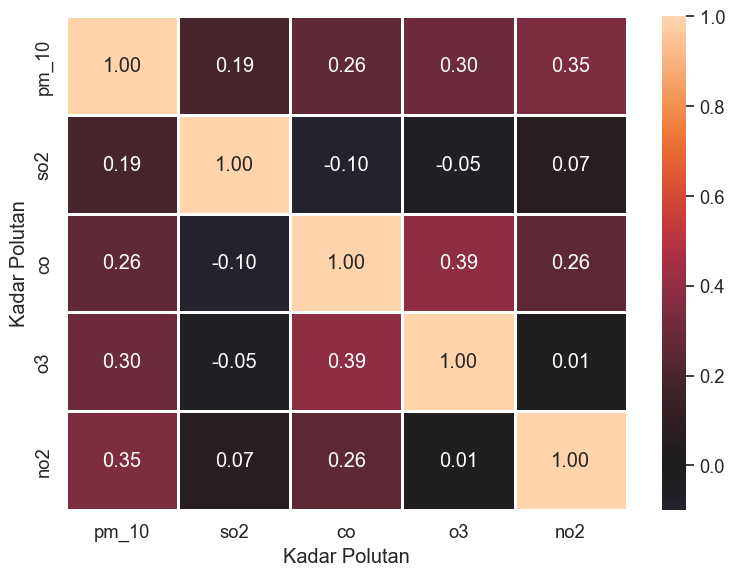

In [126]:
# Menghitung matriks korelasi
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # Atur ukuran figure
sns.set(font_scale=1.2)  # Atur ukuran font
heatmap = sns.heatmap(correlation_matrix, annot=True, center=0, linewidths=1, fmt=".2f")

# Judul heatmap
#plt.title('Koefisien Korelasi antar Parameter Polutan', fontsize=14, fontweight='bold')

# Tampilkan plot
plt.xlabel('Kadar Polutan')
plt.ylabel('Kadar Polutan')
plt.tight_layout()
plt.show()

##### **Menghitung statistik deskriptif (mean, standar deviasi, nilai minimum dan maksimum, kuartil di 25%,50% dan 75%) untuk kolom jumlah kendaraan**

In [127]:
# Data jumlah kendaraan per tahun
tahun = ["2020", "2021", "2022", "2023"]
mobil_penumpang = [3365467, 3544491, 3766059, 3836692]
bus = [35266, 36339, 37180, 38615]
truk = [679708, 713059, 748395, 802603]
sepeda_motor = [16141380, 16711638, 17304447, 18229176]

# Buat DataFrame
data_kendaraan = pd.DataFrame({
    'Tahun': tahun,
    'Mobil Penumpang': mobil_penumpang,
    'Bus': bus,
    'Truk': truk,
    'Sepeda Motor': sepeda_motor
})

# Hitung statistik deskriptif
descriptive_stats = pd.DataFrame({
    'Mean': data_kendaraan.drop(columns='Tahun').mean(),
    'Standar Deviasi': data_kendaraan.drop(columns='Tahun').std(),
    'Nilai Minimum': data_kendaraan.drop(columns='Tahun').min(),
    '25%': data_kendaraan.drop(columns='Tahun').quantile(0.25),
    '50%': data_kendaraan.drop(columns='Tahun').quantile(0.50),
    '75%': data_kendaraan.drop(columns='Tahun').quantile(0.75),
    'Nilai Maksimum': data_kendaraan.drop(columns='Tahun').max()
})

# Format angka dengan dua desimal
descriptive_stats = descriptive_stats.round(2)

# Simpan tabel statistik ke file Excel
#descriptive_stats.to_excel('statistik_kendaraan_2020_2023.xlsx', sheet_name='Statistik Kendaraan')

# Cetak statistik deskriptif ke layar
print("Statistik Deskriptif Jumlah Kendaraan Tahun 2020-2023:")
print(descriptive_stats)

Statistik Deskriptif Jumlah Kendaraan Tahun 2020-2023:
                        Mean  Standar Deviasi  Nilai Minimum          25%  \
Mobil Penumpang   3628177.25        214871.93        3365467   3499735.00   
Bus                 36850.00          1413.54          35266     36070.75   
Truk               735941.25         52550.49         679708    704721.25   
Sepeda Motor     17096660.25        891921.10       16141380  16569073.50   

                        50%          75%  Nilai Maksimum  
Mobil Penumpang   3655275.0   3783717.25         3836692  
Bus                 36759.5     37538.75           38615  
Truk               730727.0    761947.00          802603  
Sepeda Motor     17008042.5  17535629.25        18229176  


##### **Membuat grafik histogram jumlah kendaraan 2020-2023**

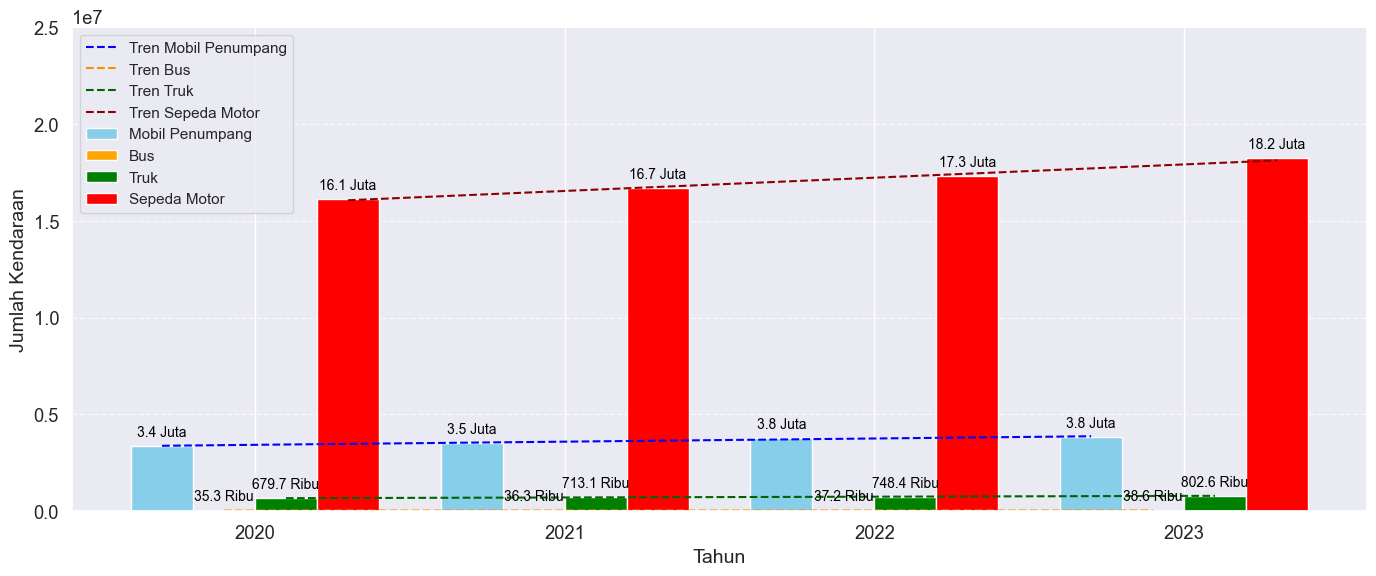

In [128]:
# Data
tahun = ["2020", "2021", "2022", "2023"]
mobil_penumpang = [3365467, 3544491, 3766059, 3836692]
bus = [35266, 36339, 37180, 38615]
truk = [679708, 713059, 748395, 802603]
sepeda_motor = [16141380, 16711638, 17304447, 18229176]

x = np.arange(len(tahun))  # posisi untuk sumbu x
width = 0.2  # lebar batang

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - 1.5 * width, mobil_penumpang, width, label='Mobil Penumpang', color='skyblue')
bars2 = ax.bar(x - 0.5 * width, bus, width, label='Bus', color='orange')
bars3 = ax.bar(x + 0.5 * width, truk, width, label='Truk', color='green')
bars4 = ax.bar(x + 1.5 * width, sepeda_motor, width, label='Sepeda Motor', color='red')

# Fungsi untuk menambahkan label di atas batang
def add_value_labels(bars, scale=1_000_000, unit='Juta'):
    for bar in bars:
        height = bar.get_height()
        label = f'{height/scale:.1f} {unit}'
        ax.annotate(label,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

# Tambahkan label dengan satuan Juta
add_value_labels(bars1, scale=1_000_000, unit='Juta')
add_value_labels(bars2, scale=1_000, unit='Ribu')
add_value_labels(bars3, scale=1_000, unit='Ribu')
add_value_labels(bars4, scale=1_000_000, unit='Juta')

# Fungsi untuk menambahkan garis tren
def add_trendline(ax, x, y, label, color, offset=0):
    # Pusatkan data x sesuai posisi batang
    x_centered = x + offset
    coeffs = np.polyfit(x_centered, y, 1)  # Regresi linear
    trendline = np.polyval(coeffs, x_centered)

    # Tambahkan garis tren
    ax.plot(x_centered, trendline, label=f'Tren {label}', linestyle='--', color=color)

# Tambahkan garis tren untuk setiap kategori
add_trendline(ax, x, mobil_penumpang, 'Mobil Penumpang', 'blue', offset=-1.5 * width)
add_trendline(ax, x, bus, 'Bus', 'darkorange', offset=-0.5 * width)
add_trendline(ax, x, truk, 'Truk', 'darkgreen', offset=0.5 * width)
add_trendline(ax, x, sepeda_motor, 'Sepeda Motor', 'darkred', offset=1.5 * width)

# Sumbu dan tata letak
ax.set_ylabel('Jumlah Kendaraan', fontsize=14)
ax.set_xlabel('Tahun', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(tahun)
ax.legend(loc='upper left',fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid horizontal ringan
ax.set_ylim(0, 2.5e7)

# Menampilkan Grafik
plt.tight_layout()
plt.show()


##### **Membuat grafik histogram rata-rata parameter ISPU Tahun 2020-2023**

<Figure size 1000x600 with 0 Axes>

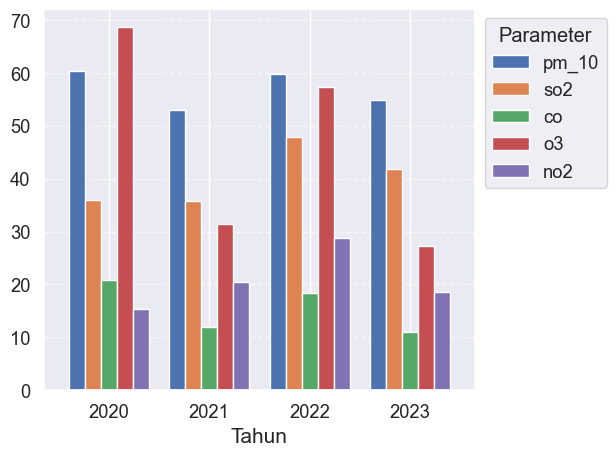

In [129]:
#Membuat Grafik Bar
plt.figure(figsize=(10, 6))

# Plot untuk setiap parameter
rata_rata_tahunan.plot(kind='bar', width=0.8)

# Menambahkan judul dan label
#plt.title('Rata-rata Parameter ISPU per Tahun 2020-2023')
plt.xlabel('Tahun', fontsize=15)

plt.xticks(rotation=0)  # Agar sumbu X tidak miring
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legenda di luar grafik agar tidak menutupi
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Parameter')

# Menampilkan grafik
plt.tight_layout()
plt.show()

##### **Membuat pie chart proporsi kategori ISPU tahun 2020-2023**

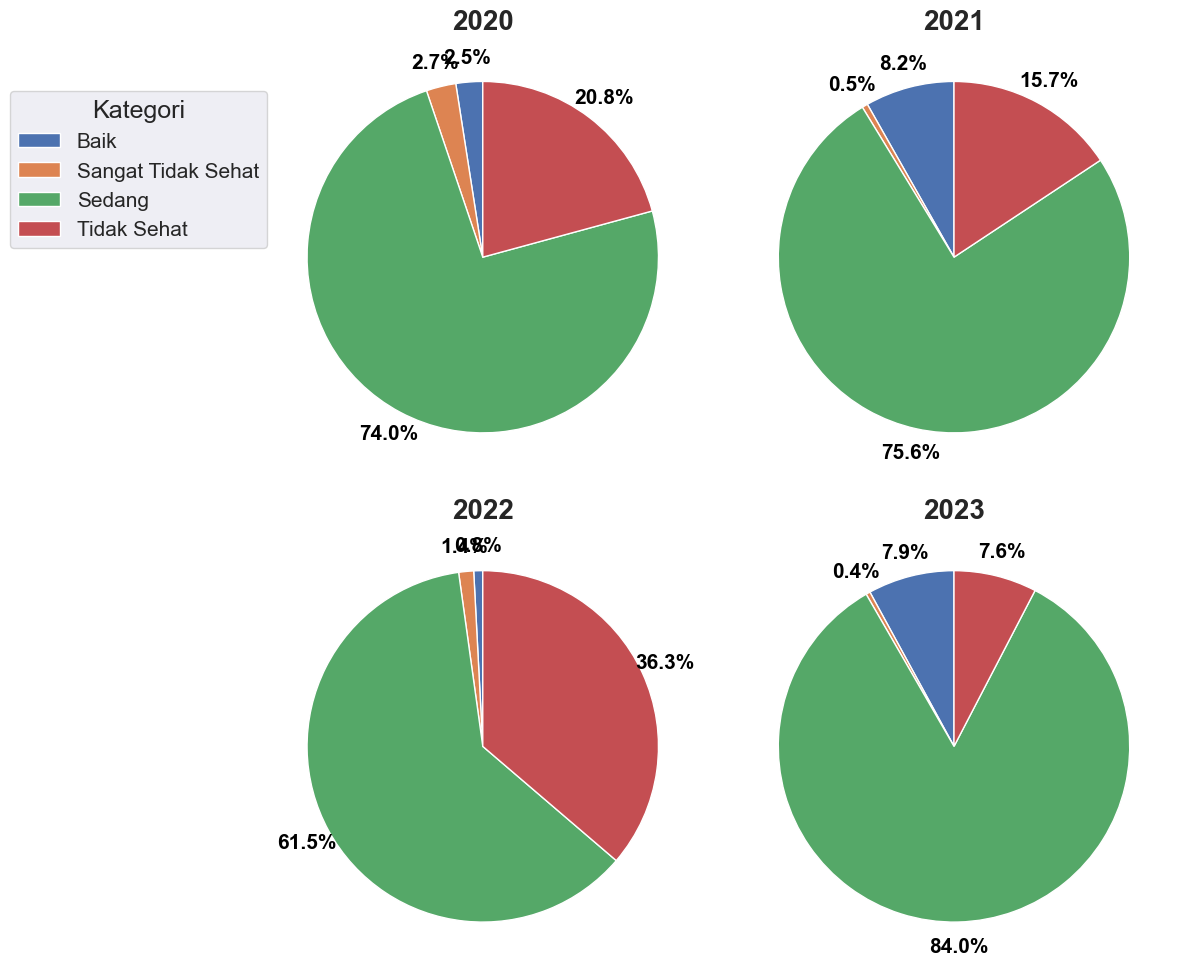

In [130]:
# Fungsi untuk menentukan kategori ISPU
def kategori_ispu(nilai_ispu):
    if nilai_ispu <= 50:
        return 'Baik'
    elif nilai_ispu <= 100:
        return 'Sedang'
    elif nilai_ispu <= 150:
        return 'Tidak Sehat'
    else:
        return 'Sangat Tidak Sehat'

# Buat kolom kategori ISPU
df['kategori'] = df['max'].apply(kategori_ispu)

# Hitung proporsi kategori per tahun
proporsi_kategori = df.groupby(['tahun', 'kategori']).size().unstack(fill_value=0)
proporsi_kategori = proporsi_kategori.div(proporsi_kategori.sum(axis=1), axis=0) * 100

# Menentukan jumlah subplot dalam grid 2x2
tahun_list = proporsi_kategori.index
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Dua baris, dua kolom

# Membuat pie chart untuk setiap tahun
for ax, (tahun, data) in zip(axes.flat, proporsi_kategori.iterrows()):
    wedges, texts, autotexts = ax.pie(
        data,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.95,  # Jarak persentase dari pusat lingkaran
    )
    

    # Memindahkan persentase ke luar lingkaran dan memberi bold
    for autotext in autotexts:
        x, y = autotext.get_position()  # Mendapatkan posisi awal
        autotext.set_position((x * 1.2, y * 1.2))  # Memindahkan ke luar
        autotext.set_fontweight('bold')  # Membuat tebal
        autotext.set_fontsize(15)  # Menyesuaikan ukuran font
        autotext.set_color('black')  # Menentukan warna

    # Menambahkan judul untuk setiap subplot
    ax.set_title(f'{tahun}', fontsize=20, fontweight='bold')

    # Menambahkan legenda untuk subplot pertama
    if tahun == tahun_list[0]:
        ax.legend(
            wedges, data.index, title='Kategori', loc="center left",
            bbox_to_anchor=(-0.6, 0.7), fontsize=15, title_fontsize=18
        )

# Menambahkan judul utama
#fig.suptitle('Proporsi Kategori ISPU Per Tahun', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


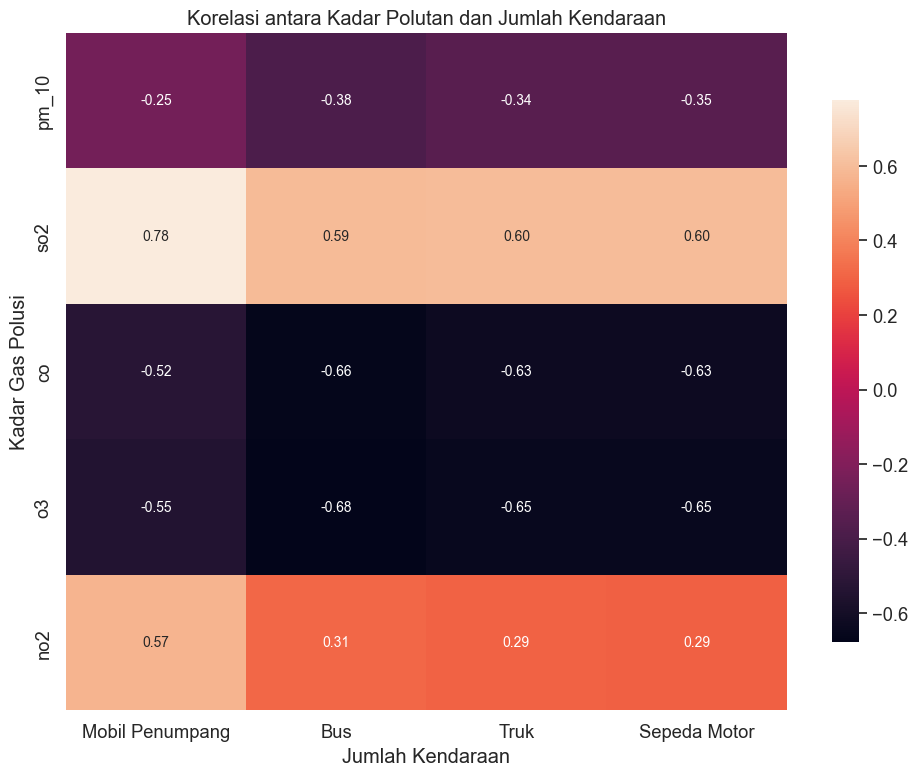

In [131]:
# Gabungkan data berdasarkan kolom 'tahun'
merged_df = pd.merge(df_trans, df_mean, on='tahun')

# Korelasi antara jumlah kendaraan dan kadar gas polusi
correlation_matrix = merged_df[['Mobil Penumpang', 'Bus', 'Truk', 'Sepeda Motor', 'pm_10', 'so2', 'co', 'o3', 'no2']].corr()

# Pilih hanya kolom kendaraan (sumbu X) dan kadar gas polusi (sumbu Y)
correlation_matrix_kendaraan_gas = correlation_matrix.loc[
    ['pm_10', 'so2', 'co', 'o3', 'no2'],
    ['Mobil Penumpang', 'Bus', 'Truk', 'Sepeda Motor']
]

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Menyesuaikan ukuran gambar untuk lebih jelas
sns.heatmap(correlation_matrix_kendaraan_gas, annot=True, fmt='.2f', annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})

# Memberikan judul
plt.title('Korelasi antara Kadar Polutan dan Jumlah Kendaraan')

# Memberikan label pada sumbu X dan Y
plt.xlabel('Jumlah Kendaraan')
plt.ylabel('Kadar Gas Polusi')

# Tampilkan plot
plt.tight_layout()  # Agar plot lebih rapi dan tidak terpotong
plt.show()


##### **Membuat file excel rata-rata parameter tiap bulan untuk tahun 2020-2023**

In [132]:
# Gabungkan semua data menjadi satu DataFrame
df = pd.concat([df_2020, df_2021, df_2022, df_2023])

# Pastikan semua kolom numerik memiliki tipe data float, dan ubah jika tidak sesuai
numeric_columns = ['pm_10', 'so2', 'co', 'o3', 'no2']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Mengubah ke numerik, non-numerik jadi NaN

# Tambahkan kolom bulan jika belum ada (asumsikan ada kolom tanggal)
df['bulan'] = pd.to_datetime(df['tanggal']).dt.month  # Pastikan ada kolom 'tanggal' dengan format tanggal

# Menghitung rata-rata tiap parameter per bulan untuk setiap tahun
rata_rata_bulanan = df.groupby(['tahun', 'bulan'])[numeric_columns].mean()

# Reset index untuk tampilan yang lebih rapi
rata_rata_bulanan = rata_rata_bulanan.reset_index()

# Menampilkan hasil rata-rata bulanan
print("Rata-rata Parameter ISPU per Bulan untuk Tiap Tahun:")
print(rata_rata_bulanan)


Rata-rata Parameter ISPU per Bulan untuk Tiap Tahun:
    tahun  bulan      pm_10        so2         co         o3        no2
0    2020      1  56.419355  34.967742  32.064516  70.516129  11.967742
1    2020      2  56.172414  25.724138  35.620690  90.655172  14.137931
2    2020      3  44.129032  18.277778  31.133333  98.806452   7.064516
3    2020      4  64.633333  26.533333  22.033333  93.300000   9.900000
4    2020      5  58.290323  25.000000  18.709677  80.645161  10.290323
5    2020      6  67.533333  23.866667  20.166667  79.633333  13.066667
6    2020      7  68.064516  25.387097  17.677419  91.741935  13.387097
7    2020      8  74.451613  27.935484  18.193548  82.548387  13.709677
8    2020      9  71.200000  51.100000  14.100000  41.500000  23.333333
9    2020     10  64.677419  53.258065  15.096774  38.032258  25.322581
10   2020     11  61.733333  56.966667  16.300000  32.800000  27.900000
11   2020     12  38.129032  55.548387   9.806452  23.354839  14.774194
12   2021  

##### **Membuat prediksi tren tiap kadar gas polutan dengan cara regresi linear**

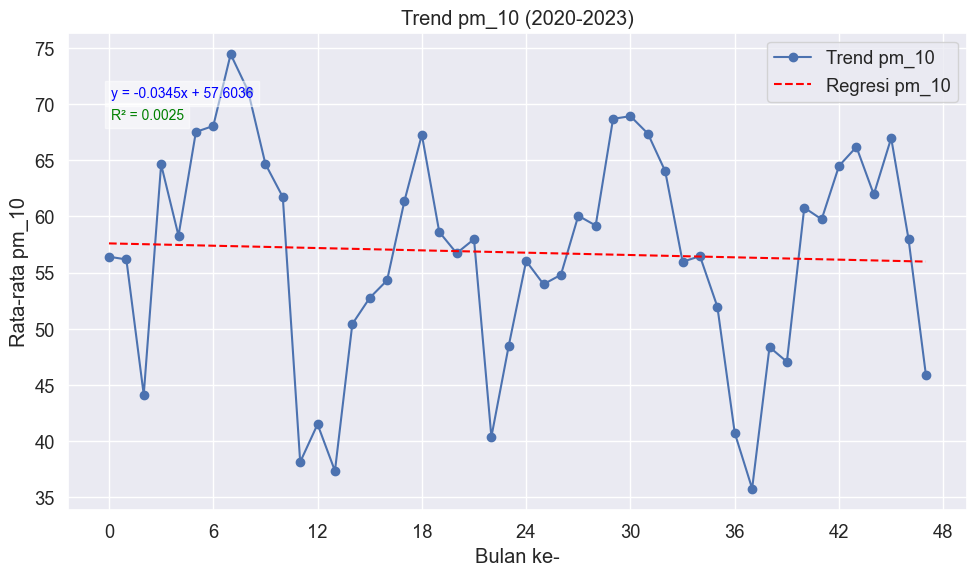

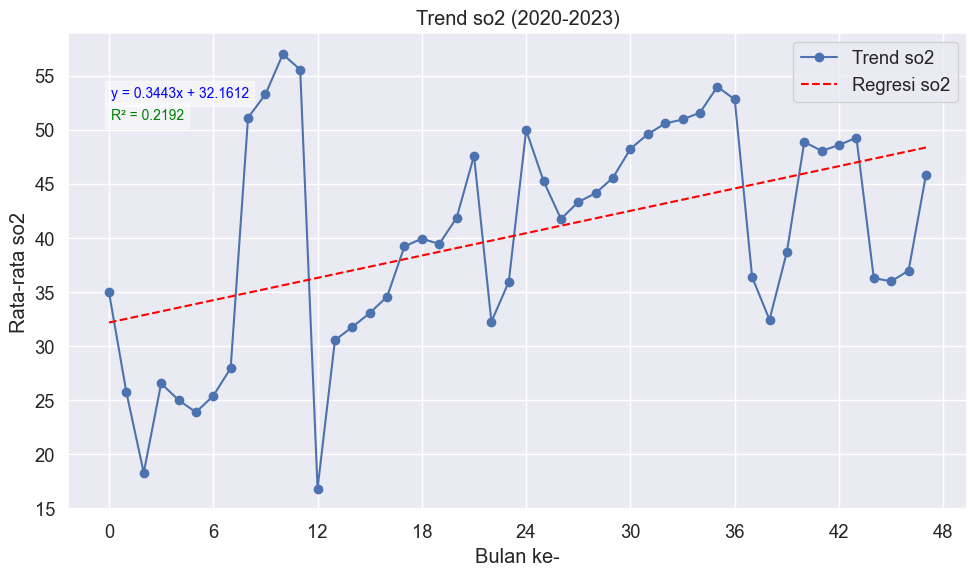

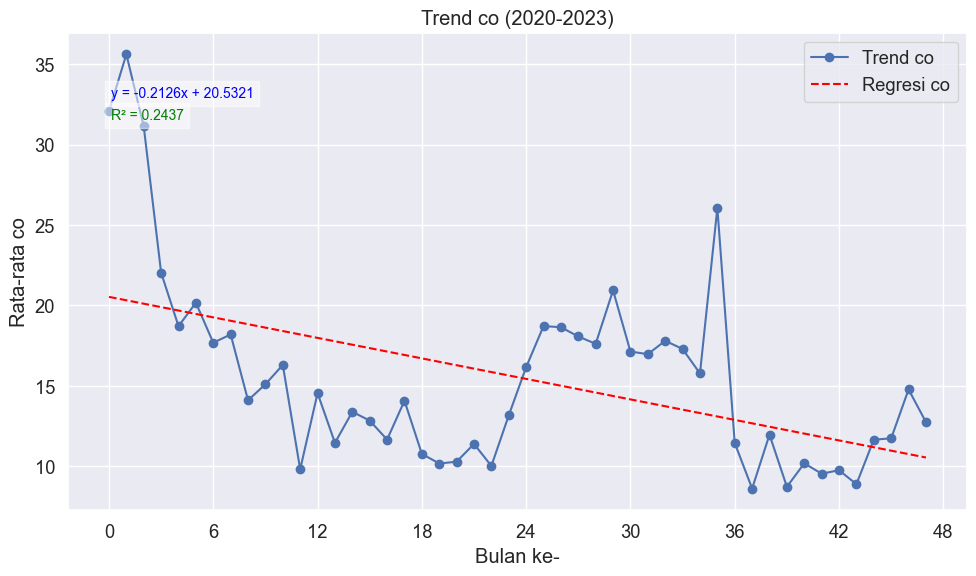

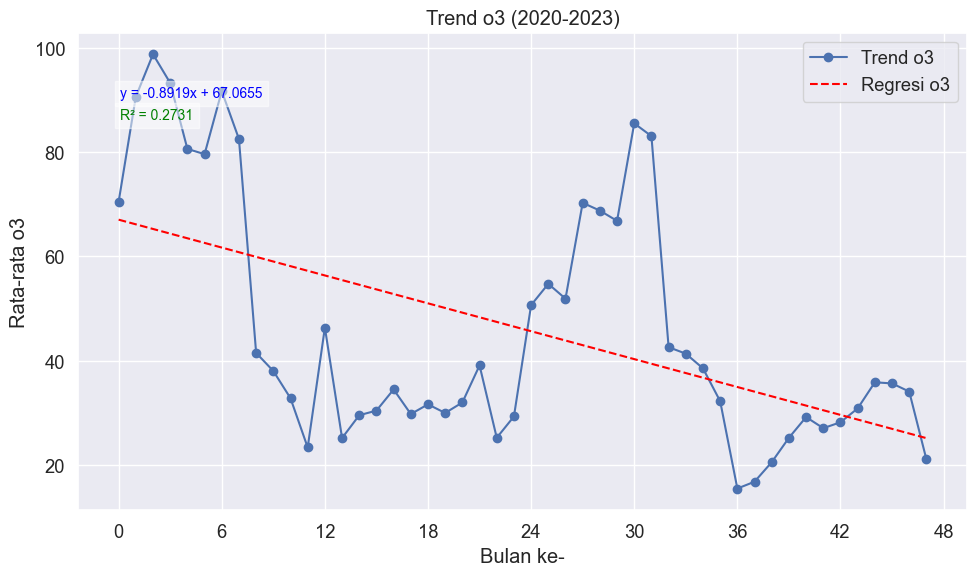

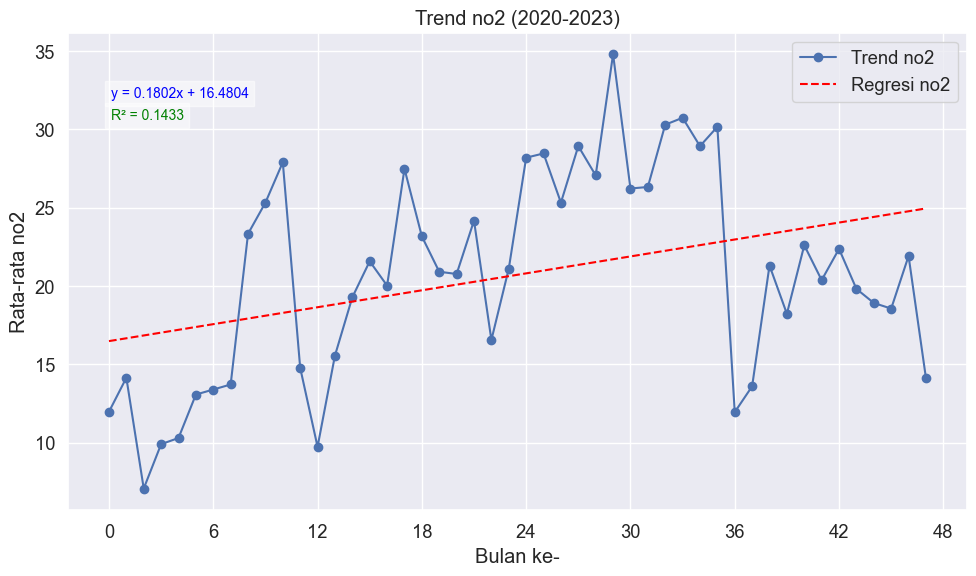

In [133]:
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator 

for param in ['pm_10', 'so2', 'co', 'o3', 'no2']:
    X = rata_rata_bulanan.index.values.reshape(-1, 1)  # Tahun sebagai variabel independen
    y = rata_rata_bulanan[param].values  # Nilai parameter ISPU sebagai variabel dependen

    if y.size == 0:
        print(f"Tidak ada data untuk parameter {param}")
        continue

    # Membuat model regresi
    model = LinearRegression()
    model.fit(X, y)

    # Membuat prediksi tren
    trend_line = model.predict(X)

    # Mendapatkan koefisien regresi, intercept, dan nilai R^2
    coef = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    # Menggunakan format 4 angka di belakang koma
    equation = f"y = {coef:.4f}x + {intercept:.4f}"
    r_squared_text = f"R² = {r_squared:.4f}"

    # Plotting tren
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, marker='o', label=f'Trend {param}')
    plt.plot(X, trend_line, color='red', linestyle='--', label=f'Regresi {param}')
    plt.title(f'Trend {param} (2020-2023)')
    plt.xlabel('Bulan ke-')
    plt.ylabel(f'Rata-rata {param}')

    # Tambahkan persamaan regresi dan R^2 ke grafik
    plt.text(
        X.min() + 0.1,
        max(y) - 0.1 * (max(y) - min(y)),
        equation,
        fontsize=10,
        color='blue',
        bbox=dict(facecolor='white', alpha=0.5)
    )
    plt.text(
        X.min() + 0.1,
        max(y) - 0.15 * (max(y) - min(y)),
        r_squared_text,
        fontsize=10,
        color='green',
        bbox=dict(facecolor='white', alpha=0.5)
    )

    # Mengatur margin manual
    plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

    # Mengatur sumbu X agar tidak ada angka desimal
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##### **Membuat distribusi kadar gas polutan dengan tipe kontur di Jakarta tahun 2023**

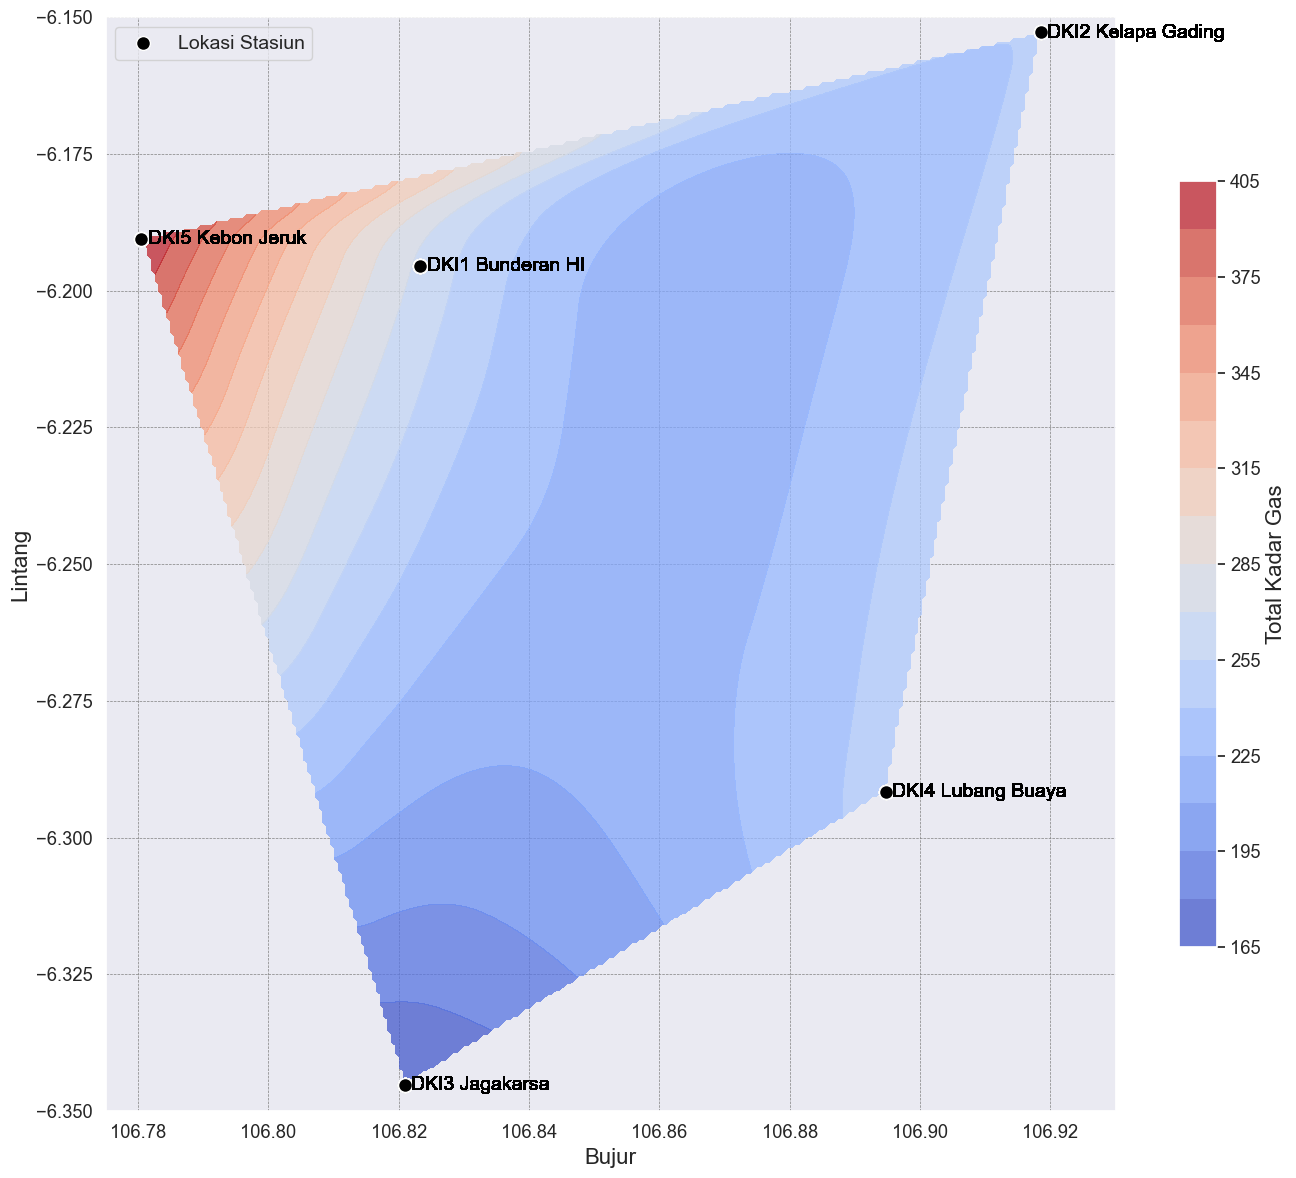

In [134]:
# Atur ukuran font secara global
plt.rcParams.update({'font.size': 14})

# Baca data dari file Excel
file_path = 'Data/ISPU 2023.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# 1. Tambahkan koordinat berdasarkan nama stasiun dari google maps
coordinates = {
    "DKI1 Bunderan HI": {"longitude": 106.8233, "latitude": -6.1955},
    "DKI2 Kelapa Gading": {"longitude": 106.9185, "latitude": -6.1528},
    "DKI3 Jagakarsa": {"longitude": 106.8209, "latitude": -6.3452},
    "DKI4 Lubang Buaya": {"longitude": 106.8947, "latitude": -6.2916},
    "DKI5 Kebon Jeruk": {"longitude": 106.7805, "latitude": -6.1905},
}

df["longitude"] = df["stasiun"].map(lambda x: coordinates.get(x, {}).get("longitude"))
df["latitude"] = df["stasiun"].map(lambda x: coordinates.get(x, {}).get("latitude"))

# Hapus baris dengan nilai koordinat kosong
df = df.dropna(subset=["longitude", "latitude"])

# 2. Tambahkan kolom total kadar gas
df["total_gas"] = df["pm_10"] + df["pm_2.5"] + df["so2"] + df["co"] * 10 + df["o3"] + df["no2"]

# 3. Interpolasi untuk peta kontur
# Siapkan grid bujur-lintang dengan resolusi halus
grid_x, grid_y = np.mgrid[106.775:106.95:300j, -6.35:-6.15:300j]

# Interpolasi nilai gas menggunakan griddata
grid_z = griddata(
    (df["longitude"], df["latitude"]),
    df["total_gas"],
    (grid_x, grid_y),
    method="cubic",
)

# 4. Plot peta distribusi kadar gas
fig, ax = plt.subplots(figsize=(14, 12))  # Perbesar ukuran figure

# Plot kontur dengan level yang jelas
contour = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap="coolwarm", alpha=0.75)
cbar = plt.colorbar(contour, ax=ax, shrink=0.7)
cbar.set_label("Total Kadar Gas", fontsize=16)  # Perbesar font label colorbar

# Plot titik lokasi stasiun sebagai marker
ax.scatter(df["longitude"], df["latitude"], c="black", s=100, edgecolor="white", label="Lokasi Stasiun")

# Tambahkan label nama stasiun dengan sedikit offset agar tidak tumpang tindih
for idx, row in df.iterrows():
    ax.text(row["longitude"] + 0.001, row["latitude"] - 0.001, row["stasiun"], fontsize=14, color="black")

# Atur tampilan sumbu dan grid
ax.set_xlim(106.775, 106.93)
ax.set_ylim(-6.35, -6.15)
ax.set_xlabel("Bujur", fontsize=16)  # Perbesar font label sumbu
ax.set_ylabel("Lintang", fontsize=16)  # Perbesar font label sumbu
#ax.set_title("Distribusi Kadar Gas dengan Kontur di Jakarta (2023)", fontsize=18, pad=20)  # Perbesar font judul

# Tambahkan grid
ax.grid(color="gray", linestyle="--", linewidth=0.5)

# Tambahkan legenda
plt.legend(loc="upper left", fontsize=14)  # Perbesar font legenda

# Tampilkan peta
plt.tight_layout()
plt.show()


## results and dicussion
*Write results of your work and discuss whether the purpose of the work has already achived or not. You can add also unsolved problem relate to the work. Include charts ond other visual elements here. You can also use tables. (Point: 10)*

![matriks korelasi antar kadar polutan.png](<attachment:matriks korelasi antar kadar polutan.png>)
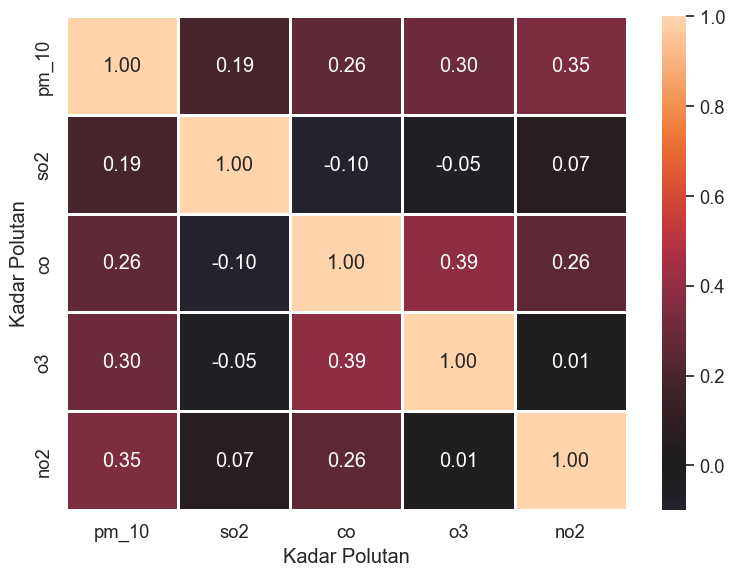

![grafik histogram jumlah kendaraan 2020-2023.png](<attachment:grafik histogram jumlah kendaraan 2020-2023.png>)
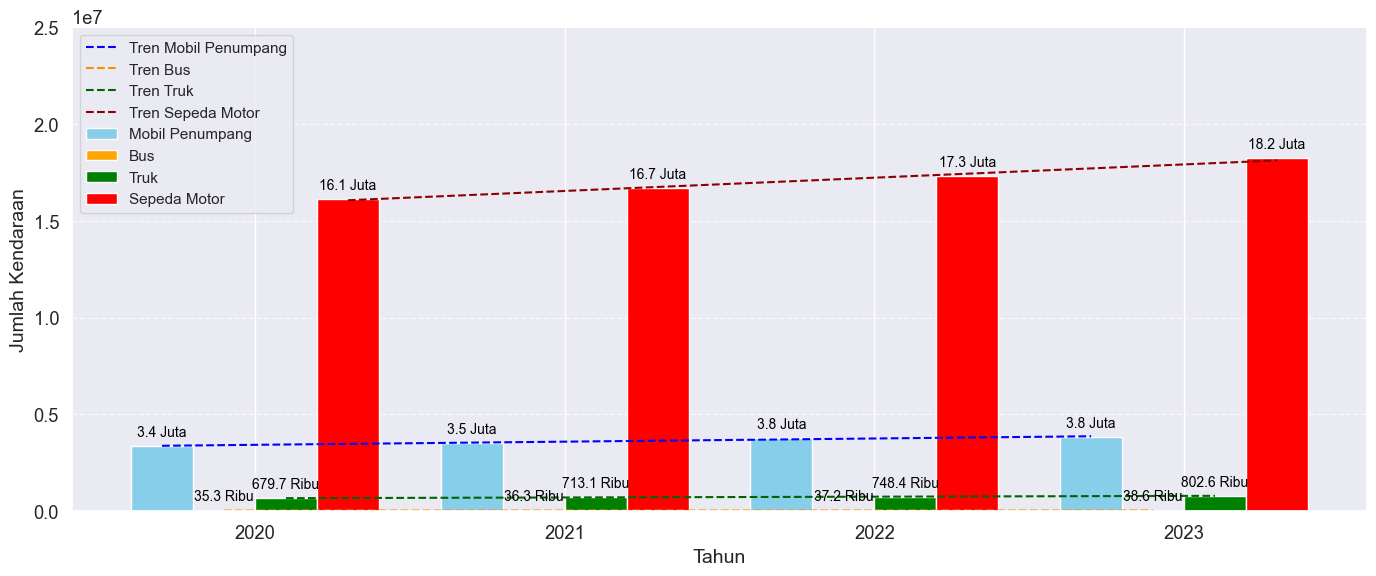

![Rata-rata Parameter ISPU Tahun 2020-2023.png](<attachment:Rata-rata Parameter ISPU Tahun 2020-2023.png>)
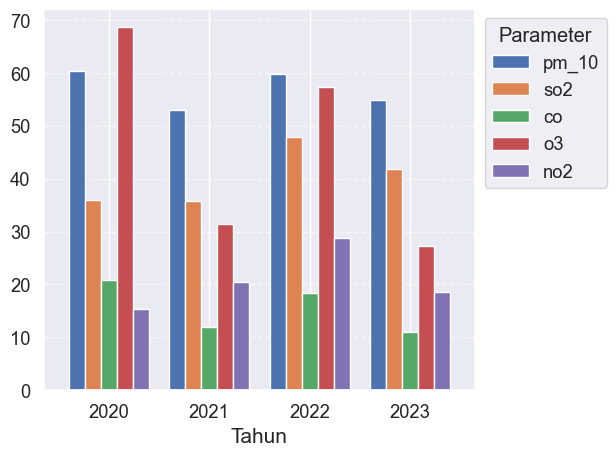

## conclusion
*Write conclusion of the work, which differs your work with others. Include also idea for future work. (Point: 5)*

## references
*Include at least four references from journals, books, manuals, blogs, websites, or other resources. Use standard format for references. (Point: 5)*